In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Mall_Customers.csv')
print('Shape of DataSet is :', df.shape)

Shape of DataSet is : (200, 5)


In [3]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [6]:
(X_train, X_test) = train_test_split(X, test_size=0.25)
print('Train Size :', X_train.shape)
print('Test Size :', X_test.shape)

Train Size : (150, 2)
Test Size : (50, 2)


In [7]:
model = KMeans(n_clusters=5, max_iter=10)
model.fit(X_train)
X_train_cluster = model.predict(X_train)
print('Model trained')

Model trained


[Text(0.5, 0, 'Annual Income'), Text(0, 0.5, 'Spending Score')]

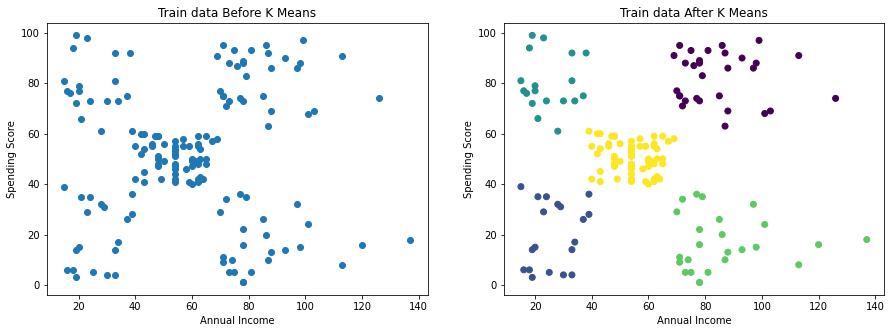

In [8]:
(fig, axis) = plt.subplots(1, 2, figsize=(15, 5))
axis[0].scatter(X_train.iloc[:, [0]], X_train.iloc[:, [1]])
axis[0].set_title('Train data Before K Means')
axis[0].set(xlabel = 'Annual Income', ylabel = 'Spending Score')
axis[1].scatter(X_train.iloc[:, [0]], X_train.iloc[:, [1]], c=X_train_cluster)
axis[1].set_title('Train data After K Means')
axis[1].set(xlabel = 'Annual Income', ylabel = 'Spending Score')

In [9]:
model.fit(X_test)
X_test_cluster = model.predict(X_test)

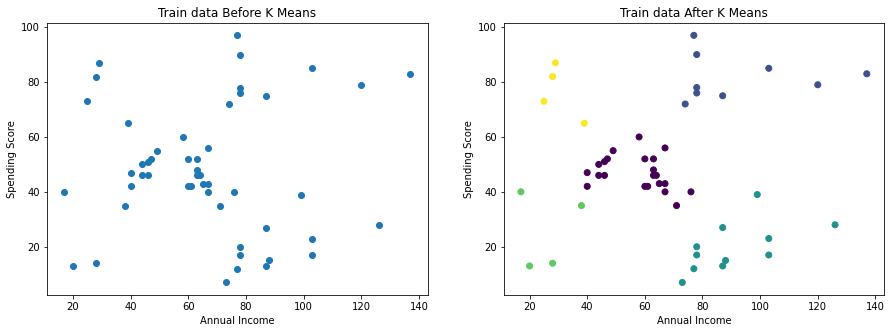

In [10]:
(fig, axis) = plt.subplots(1,2, figsize=(15, 5)) 
axis[0].scatter(X_test.iloc[:, [0]], X_test.iloc[:, [1]])
axis[0].set_title('Train data Before K Means')
axis[0].set(xlabel = 'Annual Income', ylabel ='Spending Score')
axis[1].scatter(X_test.iloc[:, [0]], X_test.iloc[:, [1]], c=X_test_cluster)
axis[1].set_title('Train data After K Means')
axis[1].set(xlabel = 'Annual Income', ylabel ='Spending Score')
plt.show()

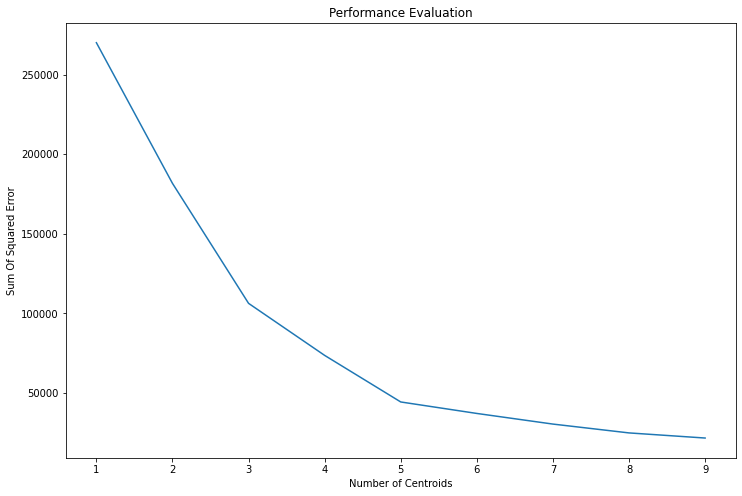

In [11]:
sse = {}

for k in range(1, 10):
    model = KMeans(n_clusters=k, max_iter=100)
    model.fit(X)
    sse[k] = model.inertia_
    
sse_list = [list(sse.keys()) , list(sse.values())]
plt.figure(figsize = (12, 8))
plt.plot(sse_list[0], sse_list[1])
plt.xlabel('Number of Centroids')
plt.ylabel('Sum Of Squared Error')
plt.title('Performance Evaluation')
plt.show()